# Imports

In [1]:
from models import Model1
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.utils.data 
import torch.nn.functional as F
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

cuda:0
Files already downloaded and verified
Files already downloaded and verified
epoch: 1 total_correct: 6792 loss: 45.04048562049866
epoch: 2 total_correct: 9051 loss: 42.98218750953674
epoch: 3 total_correct: 10870 loss: 42.17493200302124
epoch: 4 total_correct: 10346 loss: 42.428473711013794
Training Complete


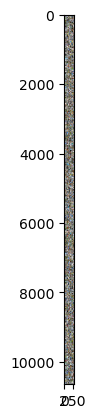

GroundTruth:  cat   ship  ship  plane frog  frog  car   frog  cat   car   plane truck dog   horse truck ship  dog   horse ship  frog  horse plane deer  truck dog   bird  deer  plane truck frog  frog  dog   deer  dog   truck bird  deer  car   truck dog   deer  frog  dog   frog  plane truck cat   truck horse frog  truck ship  plane cat   ship  ship  horse horse deer  frog  horse cat   frog  cat   frog  bird  car   bird  cat   horse bird  frog  ship  ship  plane bird  truck cat   cat   ship  ship  car   car   horse bird  dog   bird  horse ship  truck plane cat   ship  frog  deer  frog  frog  plane plane horse deer  dog   frog  cat   car   car   cat   frog  ship  horse deer  plane frog  bird  car   cat   plane deer  bird  horse ship  cat   car   bird  ship  plane ship  cat   dog   bird  deer  car   ship  truck car   bird  truck horse bird  truck frog  dog   frog  cat   ship  horse frog  bird  dog   bird  ship  truck frog  plane plane dog   bird  truck dog   deer  bird  car   frog  frog  sh

In [3]:
PATH ='./cifarmodel1.pth'

device = torch.device('cuda:0')
print(device)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

#Transformations
train_transforms = transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                    ])

test_transforms = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                    ])

#Creating the Datasets
trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transforms)
testset = datasets.CIFAR10(root='./data', train=False,
                                    download=True, transform=test_transforms)

#Data Loaders
batch_size = 2500

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                        shuffle=True, pin_memory=True)


testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                        shuffle=False, pin_memory=True)


classes = ('plane', 'car', 'bird', 'cat',
'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


model = Model1()

try:
    model.load_state_dict(torch.load(PATH))
except:
    print("File does not exist, unable to load state dictionary from PATH")

model.cuda()
criterion = nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001, betas= (0.9, 0.999), eps = 1e-08, weight_decay=0)

torch.backends.cudnn.benchmark = True

for epoch in range(4):
    total_correct = 0
    total_loss = 0
    for i, data in enumerate(trainloader, 0):
        
        #get the inputs
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = model(inputs).cuda()
        loss = F.cross_entropy(outputs,labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        total_correct += outputs.argmax(dim=1).eq(labels).sum().item()
    print('epoch:', epoch + 1, "total_correct:", total_correct, "loss:", total_loss)
print("Training Complete")

torch.save(model.state_dict(), PATH)

dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = model(images).cuda()
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images).cuda()
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

In [7]:
PATH ='./cifarmodel2.pth'

device = torch.device('cuda:0')
print(device)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

#Transformations
train_transforms = transforms.Compose([
                            transforms.GaussianBlur(kernel_size = (3,3)),
                            transforms.ToTensor(),
                            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                            transforms.RandomErasing(0.2),
                            transforms.RandomRotation(45),
                            transforms.RandomHorizontalFlip(25),
                            transforms.RandomVerticalFlip(25),
                                    ])

test_transforms = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                    ])

#Creating the Datasets
trainset = datasets.CIFAR10(root='./model2/data', train=True,
                                        download=True, transform=train_transforms)
testset = datasets.CIFAR10(root='./model2/data', train=False,
                                    download=True, transform=test_transforms)

#Data Loaders
batch_size = 2500

trainloader2 = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                        shuffle=True, pin_memory=True)


testloader2 = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                        shuffle=False, pin_memory=True)


classes = ('plane', 'car', 'bird', 'cat',
'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


model1 = Model1()

try:
    model.load_state_dict(torch.load(PATH))
except:
    print("File does not exist, unable to load state dictionary from PATH")

model1.cuda()
criterion = nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001, betas= (0.9, 0.999), eps = 1e-08, weight_decay=0)

torch.backends.cudnn.benchmark = True

for epoch in range(4):
    total_correct = 0
    total_loss = 0
    for i, data in enumerate(trainloader2, 0):
        
        #get the inputs
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = model(inputs).cuda()
        loss = F.cross_entropy(outputs,labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        total_correct += outputs.argmax(dim=1).eq(labels).sum().item()
    print('epoch:', epoch + 1, "total_correct:", total_correct, "loss:", total_loss)
print("Training Complete")

print('Finished Training')
torch.save(model.state_dict(), PATH)

dataiter2 = iter(testloader2)
images, labels = next(dataiter2)

print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

correct = 0
total = 0

with torch.no_grad():
    for data in testloader2:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = model(images).cuda()
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}


with torch.no_grad():
    for data in testloader2:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images).cuda()
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

cuda:0
Files already downloaded and verified
Files already downloaded and verified
File does not exist, unable to load state dictionary from PATH
epoch: 1 total_correct: 6734 loss: 45.90318751335144
epoch: 2 total_correct: 6173 loss: 45.30836486816406
epoch: 3 total_correct: 7873 loss: 44.53563451766968
epoch: 4 total_correct: 9188 loss: 43.632702350616455
Training Complete
Finished Training
GroundTruth:  cat   ship  ship  plane
Accuracy of the network on the 10000 test images: 12 %
Accuracy of the network on the 10000 test images: 12 %
Accuracy for class: plane is 0.0 %
Accuracy for class: car   is 0.3 %
Accuracy for class: bird  is 0.0 %
Accuracy for class: cat   is 5.5 %
Accuracy for class: deer  is 29.8 %
Accuracy for class: dog   is 15.9 %
Accuracy for class: frog  is 50.8 %
Accuracy for class: horse is 19.3 %
Accuracy for class: ship  is 3.3 %
Accuracy for class: truck is 0.0 %


In [8]:
PATH ='./cifarmodel3.pth'

device = torch.device('cuda:0')
print(device)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

#Transformations
train_transforms = transforms.Compose([
                            transforms.GaussianBlur(kernel_size = (3,3)),
                            transforms.ToTensor(),
                            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                            transforms.RandomErasing(0.2),
                            transforms.RandomRotation(45),
                            transforms.RandomHorizontalFlip(25),
                            transforms.RandomVerticalFlip(25),
                                    ])

test_transforms = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                    ])

#Creating the Datasets
trainset = datasets.CIFAR10(root='./model2/data', train=True,
                                        download=True, transform=train_transforms)
testset = datasets.CIFAR10(root='./model2/data', train=False,
                                    download=True, transform=test_transforms)

#Data Loaders
batch_size = 2500

trainloader2 = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                        shuffle=True, pin_memory=True)


testloader2 = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                        shuffle=False, pin_memory=True)


classes = ('plane', 'car', 'bird', 'cat',
'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


model2 = Model1()

try:
    model.load_state_dict(torch.load(PATH))
except:
    print("File does not exist, unable to load state dictionary from PATH")

model1.cuda()
criterion = nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001, betas= (0.9, 0.999), eps = 1e-08, weight_decay=0)

torch.backends.cudnn.benchmark = True

for epoch in range(100):
    total_correct = 0
    total_loss = 0
    for i, data in enumerate(trainloader2, 0):
        
        #get the inputs
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = model(inputs).cuda()
        loss = F.cross_entropy(outputs,labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        total_correct += outputs.argmax(dim=1).eq(labels).sum().item()
    print('epoch:', epoch + 1, "total_correct:", total_correct, "loss:", total_loss)
print("Training Complete")

print('Finished Training')
torch.save(model.state_dict(), PATH)

dataiter2 = iter(testloader2)
images, labels = next(dataiter2)

print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

correct = 0
total = 0

with torch.no_grad():
    for data in testloader2:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = model(images).cuda()
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}


with torch.no_grad():
    for data in testloader2:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images).cuda()
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

cuda:0
Files already downloaded and verified
Files already downloaded and verified
File does not exist, unable to load state dictionary from PATH
epoch: 1 total_correct: 9277 loss: 43.269787073135376
epoch: 2 total_correct: 8242 loss: 43.07383751869202
epoch: 3 total_correct: 8912 loss: 43.14526724815369
epoch: 4 total_correct: 7923 loss: 45.57160711288452
epoch: 5 total_correct: 8851 loss: 44.39819121360779
epoch: 6 total_correct: 9368 loss: 43.65787625312805
epoch: 7 total_correct: 9380 loss: 43.671916246414185
epoch: 8 total_correct: 9307 loss: 43.40334892272949
epoch: 9 total_correct: 9201 loss: 43.499711990356445
epoch: 10 total_correct: 9815 loss: 43.92550802230835
epoch: 11 total_correct: 8380 loss: 44.121381759643555
epoch: 12 total_correct: 7624 loss: 44.506420612335205
epoch: 13 total_correct: 8181 loss: 44.615854263305664
epoch: 14 total_correct: 9082 loss: 43.88927388191223
epoch: 15 total_correct: 8903 loss: 43.4867057800293
epoch: 16 total_correct: 9877 loss: 43.021579980

KeyboardInterrupt: 

stopped after a while because the loss became too great. updated the learning rate


In [9]:
PATH ='./cifarmodel4.pth'

device = torch.device('cuda:0')
print(device)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

#Transformations
train_transforms = transforms.Compose([
                            transforms.GaussianBlur(kernel_size = (3,3)),
                            transforms.ToTensor(),
                            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                            transforms.RandomErasing(0.2),
                            transforms.RandomRotation(45),
                            transforms.RandomHorizontalFlip(25),
                            transforms.RandomVerticalFlip(25),
                                    ])

test_transforms = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                    ])

#Creating the Datasets
trainset = datasets.CIFAR10(root='./model2/data', train=True,
                                        download=True, transform=train_transforms)
testset = datasets.CIFAR10(root='./model2/data', train=False,
                                    download=True, transform=test_transforms)

#Data Loaders
batch_size = 2500

trainloader2 = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                        shuffle=True, pin_memory=True)


testloader2 = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                        shuffle=False, pin_memory=True)


classes = ('plane', 'car', 'bird', 'cat',
'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


model4 = Model1()

try:
    model.load_state_dict(torch.load(PATH))
except:
    print("File does not exist, unable to load state dictionary from PATH")

model1.cuda()
criterion = nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01, betas= (0.9, 0.999), eps = 1e-08, weight_decay=0)

torch.backends.cudnn.benchmark = True

for epoch in range(4):
    total_correct = 0
    total_loss = 0
    for i, data in enumerate(trainloader2, 0):
        
        #get the inputs
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = model(inputs).cuda()
        loss = F.cross_entropy(outputs,labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        total_correct += outputs.argmax(dim=1).eq(labels).sum().item()
    print('epoch:', epoch + 1, "total_correct:", total_correct, "loss:", total_loss)
print("Training Complete")

print('Finished Training')
torch.save(model.state_dict(), PATH)

dataiter2 = iter(testloader2)
images, labels = next(dataiter2)

print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

correct = 0
total = 0

with torch.no_grad():
    for data in testloader2:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = model(images).cuda()
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}


with torch.no_grad():
    for data in testloader2:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images).cuda()
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

cuda:0
Files already downloaded and verified
Files already downloaded and verified
File does not exist, unable to load state dictionary from PATH
epoch: 1 total_correct: 5178 loss: 46.3658664226532
epoch: 2 total_correct: 4997 loss: 46.857829093933105
epoch: 3 total_correct: 5012 loss: 47.18404507637024
epoch: 4 total_correct: 5013 loss: 47.67385005950928
Training Complete
Finished Training
GroundTruth:  cat   ship  ship  plane
Accuracy of the network on the 10000 test images: 10 %
Accuracy of the network on the 10000 test images: 10 %
Accuracy for class: plane is 0.4 %
Accuracy for class: car   is 0.0 %
Accuracy for class: bird  is 0.0 %
Accuracy for class: cat   is 0.0 %
Accuracy for class: deer  is 0.0 %
Accuracy for class: dog   is 0.0 %
Accuracy for class: frog  is 100.0 %
Accuracy for class: horse is 0.0 %
Accuracy for class: ship  is 0.0 %
Accuracy for class: truck is 0.0 %
